In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import csv
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
df = pd.read_csv('train.csv')

df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
sample_submission = pd.read_csv('sample_submission.csv')

sample_submission.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [4]:
test_df = pd.read_csv('test.csv')

test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


# Preprocessing

## Remove Stopwords

In [6]:
def remove_stopwords(sentence):
    nltk.download('stopwords')

    sentence = sentence.lower()
    sentence = ' '.join([word for word in sentence.split() if word not in stopwords.words('english')])
    return sentence

In [7]:
remove_stopwords("I am about to go to the store and get any snack")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'go store get snack'

## Reading raw data

In [8]:
def parse_data_from_file(filename):
    sentences = []
    labels = []

    with open(filename, 'r', encoding='utf-8') as csvfile:
        csv_data = csv.reader(csvfile, delimiter=',')
        next(csv_data)

        for row in csv_data:
            sentences.append(remove_stopwords(row[3]))
            labels.append(row[4])

    return sentences, labels

In [9]:
sentences, labels = parse_data_from_file('train.csv')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[

Number of training sentences: 7613
First sentence has 7 words
Number of labels: 7613


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[

In [11]:
print(f"Number of training sentences: {len(sentences)}")
print(f"First sentence has {len(sentences[0].split())} words")

print(f"Number of labels: {len(labels)}")

Number of training sentences: 7613
First sentence has 7 words
Number of labels: 7613


In [10]:
NUM_WORDS = 1000
EMBEDDING_DIM = 16
MAXLEN = 120
PADDING = 'post'
OOV_TOKEN = "<OOV>"
TRAINING_SPLIT = .8

## Split Dataset

In [12]:
def train_val_split(sentences, labels, train_split):
    train_size = int(len(sentences) * train_split)

    train_sentences = sentences[:train_size]
    train_labels = labels[:train_size]

    val_sentences = sentences[train_size:]
    val_labels = labels[train_size:]

    return train_sentences, train_labels, val_sentences, val_labels

In [13]:
train_sentences, train_labels, val_sentences, val_labels = train_val_split(sentences, labels, TRAINING_SPLIT)

print(f"Number of training sentences: {len(train_sentences)}")
print(f"Number of training labels: {len(train_labels)}")
print(f"Number of validation sentences: {len(val_sentences)}")
print(f"Number of validation labels: {len(val_labels)}")

Number of training sentences: 6090
Number of training labels: 6090
Number of validation sentences: 1523
Number of validation labels: 1523


# Tokenization

In [14]:
tokenizer = Tokenizer(num_words=NUM_WORDS, oov_token=OOV_TOKEN)

In [15]:
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

In [16]:
print(f"Vocabulary contains {len(word_index)} words\n")
print("<OOV> token included in vocabulary" if "<OOV>" in word_index else "<OOV> token NOT included in vocabulary")

Vocabulary contains 19281 words

<OOV> token included in vocabulary


In [17]:
sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(sequences, maxlen=MAXLEN, padding=PADDING, truncating='post')

In [18]:
val_sequences = tokenizer.texts_to_sequences(val_sentences)
val_padded = pad_sequences(val_sequences, maxlen=MAXLEN, padding=PADDING, truncating='post')

In [19]:
print(f"Padded training sequences have shape: {padded.shape}\n")
print(f"Padded validation sequences have shape: {val_padded.shape}")

Padded training sequences have shape: (6090, 120)

Padded validation sequences have shape: (1523, 120)


In [20]:
def tokenize_labels(all_labels, split_labels):
    label_tokenizer = Tokenizer()
    label_tokenizer.fit_on_texts(all_labels)

    label_seq = label_tokenizer.texts_to_sequences(split_labels)
    label_seq_np = np.array(label_seq) - 1

    return label_seq_np

In [21]:
train_label_seq = tokenize_labels(labels, train_labels)
val_label_seq = tokenize_labels(labels, val_labels)

print(f"First 5 training label sequence: {train_label_seq[:5]}")
print(f"First 5 validation label sequence: {val_label_seq[:5]}")
print(f"Shape of training label sequences: {train_label_seq.shape}")
print(f"Shape of validation label sequences: {val_label_seq.shape}")

First 5 training label sequence: [[1]
 [1]
 [1]
 [1]
 [1]]
First 5 validation label sequence: [[0]
 [1]
 [0]
 [0]
 [0]]
Shape of training label sequences: (6090, 1)
Shape of validation label sequences: (1523, 1)


# Build Model

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(NUM_WORDS, EMBEDDING_DIM, input_length=MAXLEN),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [23]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model

In [24]:
history = model.fit(
    padded,
    train_label_seq,
    epochs=30,
    validation_data=(val_padded, val_label_seq)
)

Epoch 1/30
191/191 [==============================] - 6s 15ms/step - loss: 0.6800 - accuracy: 0.5793 - val_loss: 0.6932 - val_accuracy: 0.5345
Epoch 2/30
191/191 [==============================] - 3s 13ms/step - loss: 0.6737 - accuracy: 0.5793 - val_loss: 0.6833 - val_accuracy: 0.5345
Epoch 3/30
191/191 [==============================] - 3s 14ms/step - loss: 0.6556 - accuracy: 0.5867 - val_loss: 0.6496 - val_accuracy: 0.6218
Epoch 4/30
191/191 [==============================] - 2s 11ms/step - loss: 0.6134 - accuracy: 0.6814 - val_loss: 0.6174 - val_accuracy: 0.6376
Epoch 5/30
191/191 [==============================] - 2s 12ms/step - loss: 0.5641 - accuracy: 0.7312 - val_loss: 0.5703 - val_accuracy: 0.7367
Epoch 6/30
191/191 [==============================] - 3s 13ms/step - loss: 0.5171 - accuracy: 0.7670 - val_loss: 0.5426 - val_accuracy: 0.7584
Epoch 7/30
191/191 [==============================] - 3s 13ms/step - loss: 0.4815 - accuracy: 0.7895 - val_loss: 0.5213 - val_accuracy: 0.7682

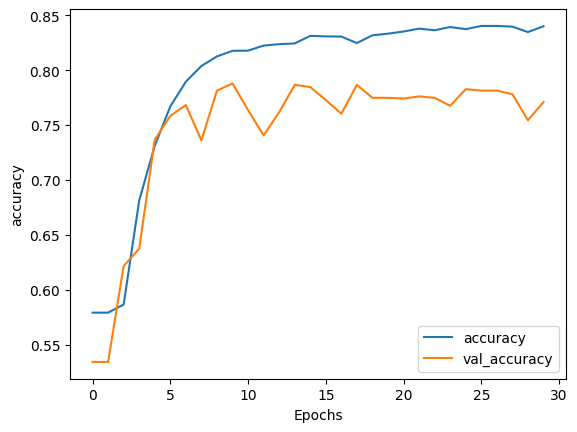

In [25]:
# plot accuracy and loss
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_' + string])
    plt.show()

plot_graphs(history, 'accuracy')

# Submission

In [26]:
# predict the test.csv
test_sentences = test_df['text'].values
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=MAXLEN, padding=PADDING, truncating='post')

In [27]:
predictions = model.predict(test_padded)

102/102 [==============================] - 0s 3ms/step


In [28]:
# create submission.csv
submission = pd.DataFrame()
submission['id'] = test_df['id']
submission['target'] = predictions.round().astype(int)
submission.to_csv('submission.csv', index=False)